# Scikit-Learn의 SVM

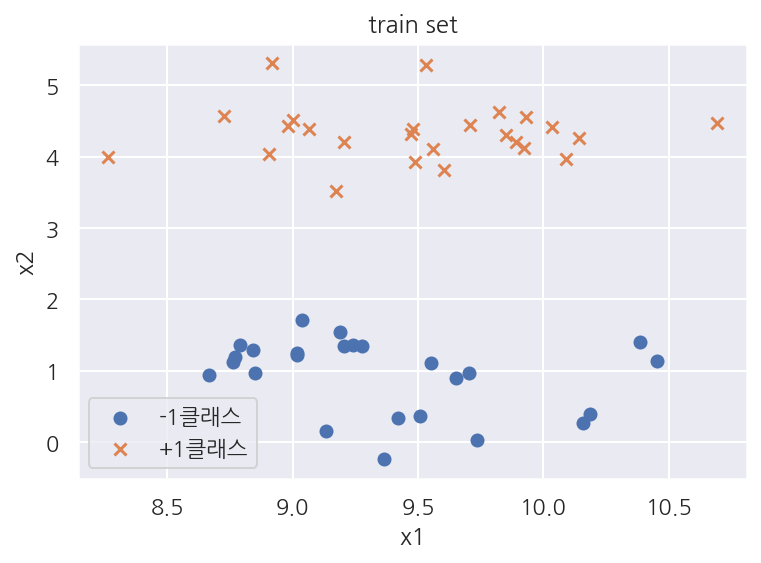

In [2]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
plt.rcParams['font.family'] = 'NanumGothic'
warnings.simplefilter('ignore')

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2*y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label='-1클래스')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', label='+1클래스')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.title('train set')
plt.show()

- kerner = 'linerar'
- C = 매우 큰값 (백억)

In [4]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

- n_support_: 각 클래스의 서포트의 개수

- support_: 각 클래스의 서포트의 인덱스

- support_vectors_: 각 클래스의 서포트의 x 값. x+와 x−

- coef_: w 벡터

- intercept_: −w0

- dual_coef_: 각 원소가 ai⋅yi로 이루어진 벡터

In [5]:
model.n_support_

array([1, 1])

In [6]:
model.support_

array([42,  1])

In [7]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [8]:
model.coef_

array([[0.08171082, 1.10091404]])

In [9]:
model.intercept_

array([-3.62995208])

In [10]:
model.dual_coef_

array([[-0.60934379,  0.60934379]])

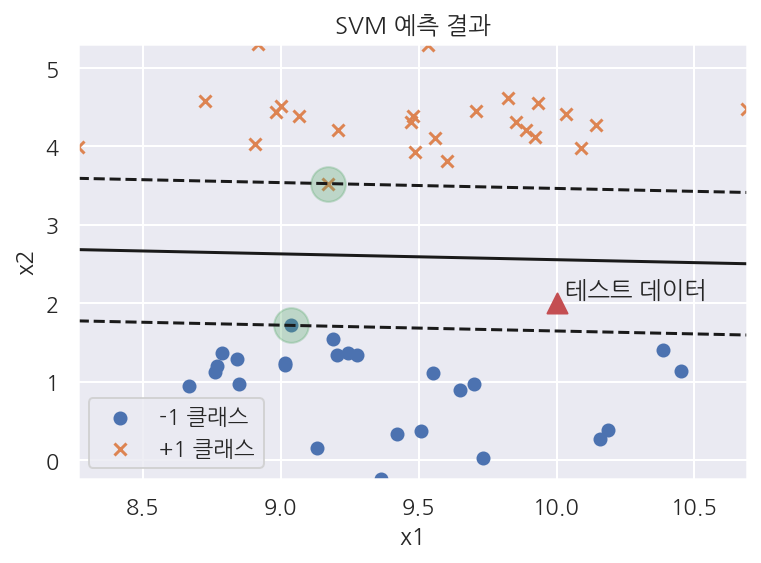

In [11]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[
            :, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [12]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])

In [13]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

## 연습문제

붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 kernel과 슬랙변수 가중치 인수 C는 각각 linear, 1e10으로 한다.

- 특징 변수를 꽃받침의 길이와 폭만 사용한다.

- 붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.



In [38]:
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.svm import SVC
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
mask = np.where((y == 0) | (y == 1))[0]
X = X[mask]
y = y[mask]


model = SVC(kernel='linear', C=1e10).fit(X, y)

print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Text(0, 0.5, '꽃받침 길이')

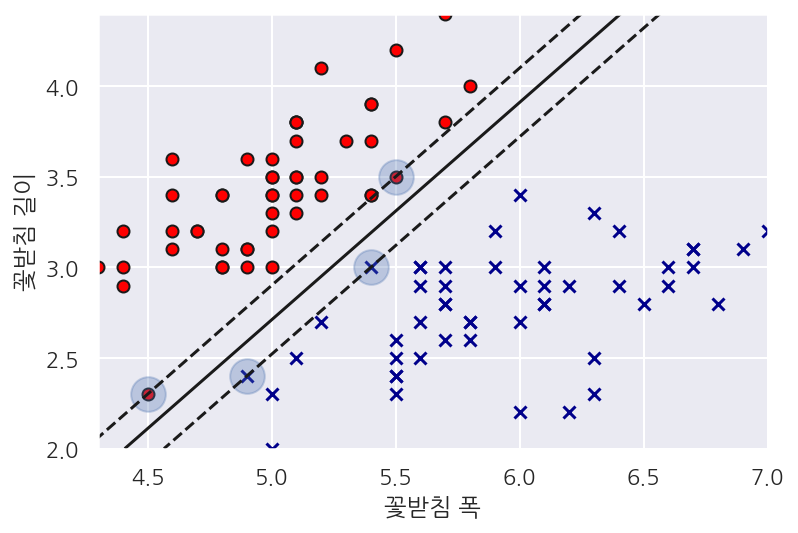

In [49]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red',
            marker='o', edgecolor='k', label='setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='darkblue',
            marker='x', edgecolor='k', label='versicolor')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[
            :, 1], s=300, alpha=0.3)
plt.xlabel('꽃받침 폭')
plt.ylabel('꽃받침 길이')

## 연습문제

In [67]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris = load_iris()
X2 = iris.data[50:, 2:]
y2 = iris.target[50:] - 1

model1 = SVC(kernel="linear", C=1e10).fit(X2, y2)

print(classification_report(y2, model1.predict(X2)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        50
           1       1.00      0.90      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



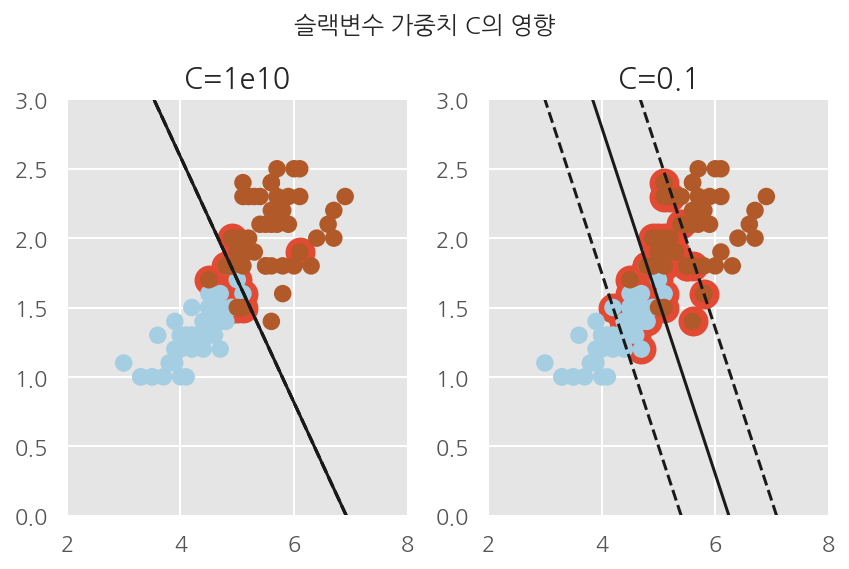

In [68]:
plotnum = 1
for name, penalty in (('C=1e10', 1e10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X2, y2)
    xx = np.linspace(2, 8)

    x_jin = 2
    x_jax = 8
    y_jin = 0
    y_jax = 3
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[
                :, 1], s=120, linewidth=4)
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=60,
                linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)

    plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()

## MNIST Digit 이미지

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digit = load_digits()
X = digit.data
y = digit.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [74]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X_train, y_train)

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00       113
           4       1.00      1.00      1.00       118
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00       105
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00       106

    accuracy                           1.00      1078
   macro avg       1.00      1.00      1.00      1078
weighted avg       1.00      1.00      1.00      1078



In [75]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      0.97      0.96        73
           2       1.00      0.99      0.99        71
           3       0.95      0.99      0.97        70
           4       0.98      1.00      0.99        63
           5       0.97      0.97      0.97        89
           6       0.99      0.99      0.99        76
           7       1.00      0.98      0.99        65
           8       0.96      0.92      0.94        78
           9       0.97      0.96      0.97        74

    accuracy                           0.97       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.97      0.97       719



# 얼굴 이미지 인식

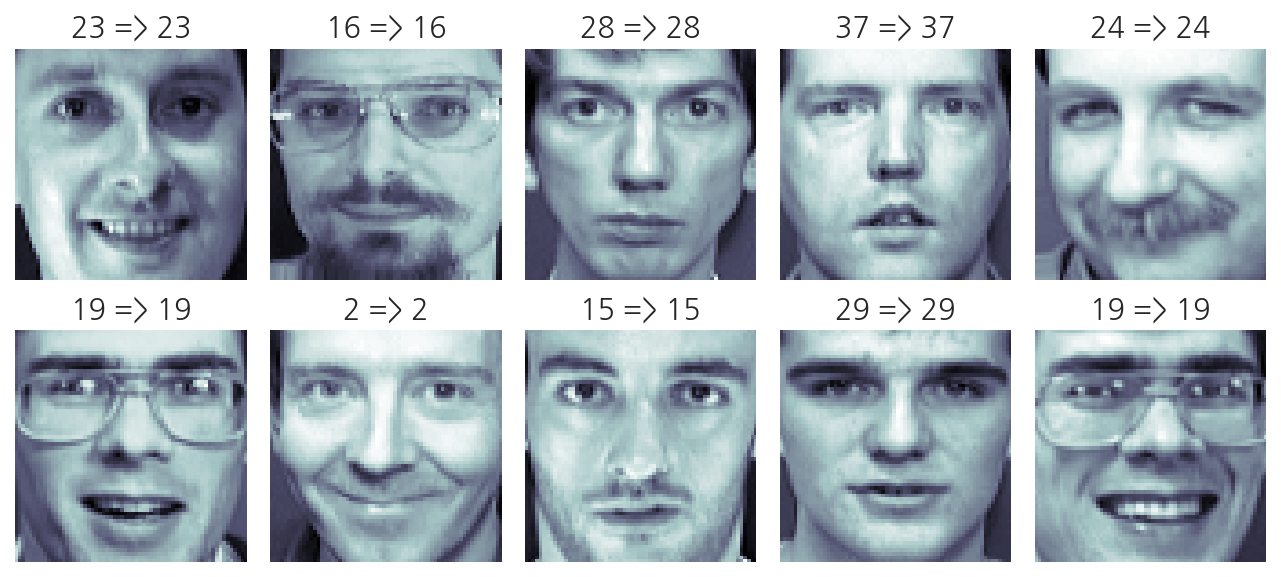

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" %
                  (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

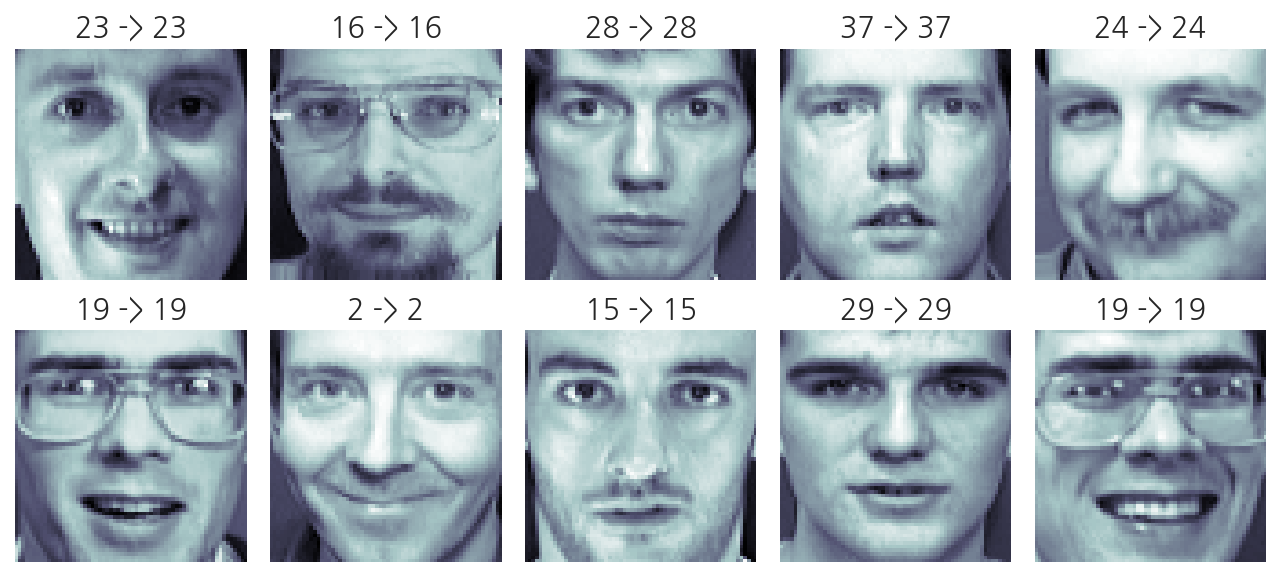

In [90]:
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N*M)
for i in range(N):
    for j in range(M):
        k = klist[i*M + j]
        ax = fig.add_subplot(N, M, i*M + j + 1)
        ax.imshow(X_test[k:(k+1),:].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title('%d -> %d' % (y_test[k], svc.predict(X_test[k:(k+1), :])[0]))
plt.tight_layout()
plt.show()

In [93]:
print(classification_report(y_train, svc.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [94]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    